<a href="https://colab.research.google.com/github/WeizmannML/course2020/blob/master/Tutorial6/Graph_Network_Tutorial_DGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install dgl
# !pip install networkx

In [2]:
import torch

### Let's start out of the box and draw a graph

Using backend: pytorch
/Users/sanmay/anaconda3/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


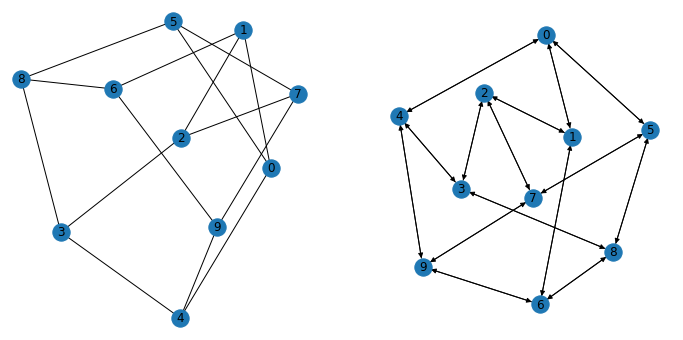

In [3]:
import networkx as nx
import dgl
import dgl.function as fn

g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

plt.show()


### Building a graph from scratch

/Users/sanmay/anaconda3/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


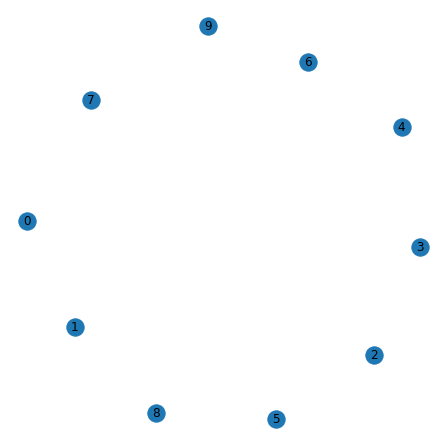

In [4]:
import torch as th

plt.rcParams["figure.figsize"] = (6,6)
g = dgl.DGLGraph()
g.add_nodes(10)
# # a couple edges one-by-one
# for i in range(1, 4):
#     g.add_edge(i, 0)
# # a few more with a paired list
# src = list(range(5, 8)); dst = [0]*3
# g.add_edges(src, dst)
# # finish with a pair of tensors
# src = th.tensor([8, 9]); dst = th.tensor([0, 0])
# g.add_edges(src, dst)

# # edge broadcasting will do star graph in one go!
# g.clear(); g.add_nodes(10)
# src = th.tensor(list(range(1, 10)));
# g.add_edges(src, 0)

nx.draw(g.to_networkx(), with_labels=True)
plt.show()

### Define the edges with a start-node and an end-node

/Users/sanmay/anaconda3/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: DGLGraph.add_edge is deprecated. Please use DGLGraph.add_edges
  return warnings.warn(message, category=category, stacklevel=1)


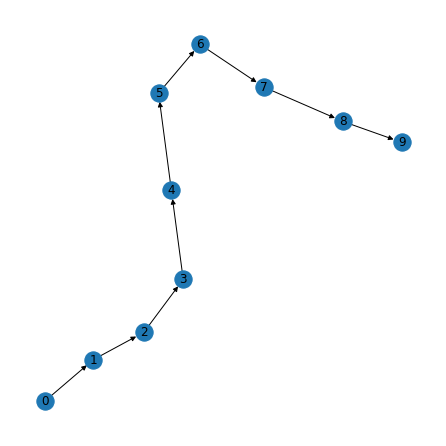

In [5]:
for i in range(0, 9):
    g.add_edge(i, i+1)
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

### Nodes as a vector in DGL and NetworkX

In [6]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
g.to_networkx().nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

### Features to nodes and edges

In [8]:
# --- creating a graph with 10 nodes -- #
g = dgl.DGLGraph()
g.add_nodes(10)

In [9]:
g.nodes[1]

NodeSpace(data={})

In [10]:
g.edges()

(tensor([], dtype=torch.int64), tensor([], dtype=torch.int64))

### Assigning data on the nodes 

In [11]:
x = th.randn(10, 3)
g.ndata['x'] = x # -- assigning a name to the feature : 'x'

In [12]:
g.ndata

{'x': tensor([[ 0.2629,  0.5477, -0.1463],
        [-0.2122, -0.8415,  0.6848],
        [ 0.5755, -2.4892,  2.5152],
        [-0.5929,  0.2010, -2.3845],
        [-0.1480, -0.0809, -0.2780],
        [ 2.4625,  0.9436,  0.2608],
        [-0.0204, -0.2191,  2.3474],
        [-0.7026, -1.0240, -1.4795],
        [ 1.7801, -1.8975, -2.2728],
        [-1.0041, -0.2167, -0.0614]])}

### Data on a particular node

In [13]:
g.nodes[3].data['x'], g.ndata['x'][3]

(tensor([[-0.5929,  0.2010, -2.3845]]), tensor([-0.5929,  0.2010, -2.3845]))

###  What if I want to assign features to any individual node ?

In [14]:
# access node set with integer, list, or integer tensor
g.nodes[0].data['x'] = 2 * th.ones(1, 3)
g.nodes[[1, 2]].data['x'] = th.zeros(2, 3)


### Another way to add edges at one go

In [15]:
# edge broadcasting will do star graph in one go!
g = dgl.DGLGraph(); g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

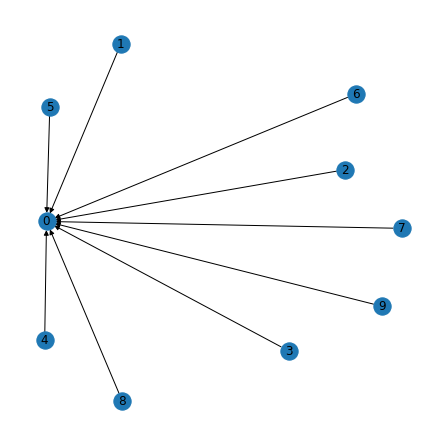

In [16]:
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

### Adding feature to edges in two different ways 

In [17]:
g.edata['w'] = th.randn(9, 2)

# access edge set with IDs in integer, list, or integer tensor
g.edges[1].data['w'] = th.randn(1, 2)
g.edges[[0, 1, 2]].data['w'] = th.zeros(3, 2)
g.edges[th.tensor([0, 1, 2])].data['w'] = th.zeros(3, 2)

# one can also access the edges by giving endpoints
g.edges[1, 0].data['w'] = th.ones(1, 2)                 # edge 1 -> 0
g.edges[[1, 2, 3], [0, 0, 0]].data['w'] = th.ones(3, 2) # edges [1, 2, 3] -> 0

In [18]:
x = th.randn(10, 3)
g.ndata['x'] = x

### Accessing the edges 

In [19]:
g.edges()

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0]))

### How to acceess the data on the edges ?

In [20]:
g.edges[6, 0] 

EdgeSpace(data={'w': tensor([[0.0440, 0.4887]])})

In [21]:
g.edges[6, 0].data

{'w': tensor([[0.0440, 0.4887]])}

In [22]:
edg = g.edges[6, 0] 

In [23]:
edg.data

{'w': tensor([[0.0440, 0.4887]])}

In [24]:
g.nodes[1]

NodeSpace(data={'x': tensor([[-0.1146, -0.0024, -0.2748]])})

## Message passing
### a node data is updated by aggregating information from neighbouring nodes

### basic in-built functions

In [25]:
## -- a random graph in dgl -- ##
g = dgl.rand_graph(100, 10)

In [26]:
g.ndata['h'] = torch.randn((g.num_nodes(), 10))
g.edata['w'] = torch.randn((g.num_edges(), 1))

In [27]:
g

Graph(num_nodes=100, num_edges=10,
      ndata_schemes={'h': Scheme(shape=(10,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(1,), dtype=torch.float32)})

In [28]:
g.apply_edges(lambda edges: {'ex' : edges.src['h'] + edges.dst['h']})

In [29]:
g

Graph(num_nodes=100, num_edges=10,
      ndata_schemes={'h': Scheme(shape=(10,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(1,), dtype=torch.float32), 'ex': Scheme(shape=(10,), dtype=torch.float32)})

In [30]:
g.apply_nodes(lambda nodes: {'nx' : nodes.data['h'] * 2})

In [31]:
g

Graph(num_nodes=100, num_edges=10,
      ndata_schemes={'h': Scheme(shape=(10,), dtype=torch.float32), 'nx': Scheme(shape=(10,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(1,), dtype=torch.float32), 'ex': Scheme(shape=(10,), dtype=torch.float32)})

In [32]:
g.update_all(message_func=fn.u_mul_e('h', 'w', 'm'), reduce_func=fn.sum('m', 'h_new'))

In [33]:
g

Graph(num_nodes=100, num_edges=10,
      ndata_schemes={'h': Scheme(shape=(10,), dtype=torch.float32), 'nx': Scheme(shape=(10,), dtype=torch.float32), 'h_new': Scheme(shape=(10,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(1,), dtype=torch.float32), 'ex': Scheme(shape=(10,), dtype=torch.float32)})

In [34]:
#g.apply_nodes??

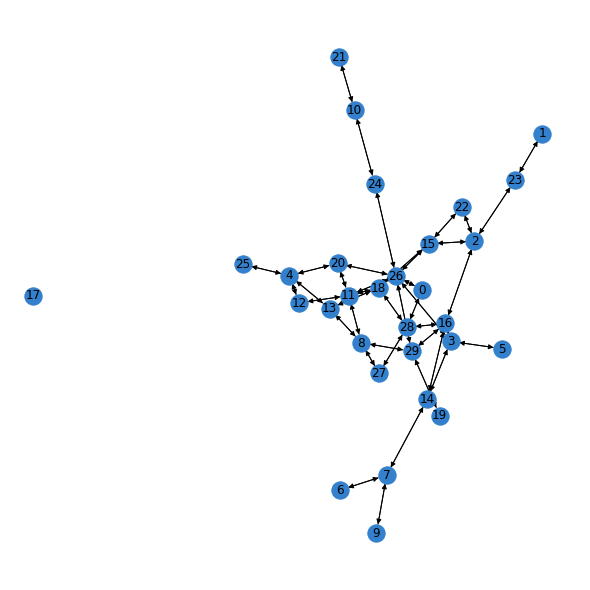

In [35]:
N = 30  # number of nodes
DAMP = 0.85  # damping factor
K = 10  # number of iterations
g = nx.nx.erdos_renyi_graph(N, 0.1)
g = dgl.DGLGraph(g)

plt.rcParams["figure.figsize"] = (8,8)
nx.draw(g.to_networkx(),  node_color=[[.2, .5, .8,]], with_labels=True)
plt.show()

### Assign to different data on the nodes

In [36]:
g.ndata['pv'] = torch.ones(N) / N
g.ndata['deg'] = g.out_degrees(g.nodes()).float()

In [37]:
g

Graph(num_nodes=30, num_edges=82,
      ndata_schemes={'pv': Scheme(shape=(), dtype=torch.float32), 'deg': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})

In [38]:
g.nodes()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [39]:
g.out_degrees(3), g.in_degrees(3), g.out_degrees(7)

(4, 4, 3)

In [40]:
g.ndata['pv']

tensor([0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
        0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
        0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
        0.0333, 0.0333, 0.0333])

In [41]:
g.ndata['deg']

tensor([2., 1., 4., 4., 4., 1., 1., 3., 4., 1., 2., 5., 2., 3., 3., 4., 5., 0.,
        4., 1., 3., 1., 2., 2., 2., 1., 7., 2., 4., 4.])

### Make four copies of the same graph for illustration purpose

In [42]:
g1, g2, g3, g4 = g.local_var(), g.local_var(), g.local_var(), g.local_var()

### Implementation of the page rank algorithm <br> $PV(u) = \frac{1-d}{N} + d ~\times~~ \sum_{v \in \mathcal{N}(u) } \frac{PV(v)}{D(v)} $ <br> The node aggregation function is invariant under permutation of the neighbouring nodes. <br> It's a two stage process, first the 'message' is passed by each node along all the edges, originating from the node. At the next step, all the 'messages' received by a node is used to update (in a permutation invariant way) to update the node data. 

In [43]:
def pagerank_message_func(edges):
    return {'pv' : edges.src['pv'] / edges.src['deg']}

In [44]:
def pagerank_reduce_func(nodes):
    msgs = torch.sum(nodes.mailbox['pv'], dim=1)
    pv = (1 - DAMP) / N + DAMP * msgs
    return {'pv' : pv}

### Notice the usage of 'mailbox', it stores all the data on a node, received through edges when the message function is executed. Each node has its individual 'mailbox'. Also notice, the contents of the mailbox are summed up and hence the final result doesn't depend on the order of the nodes which sent messages to a particular node

In [45]:
import dgl.function as fn
for g in [g1, g2, g3] : 
    g.update_all(message_func=fn.copy_src(src='pv', out='m'),
                 reduce_func=fn.sum(msg='m',out='m_sum'))

In [46]:
def pagerank_naive(g):
        
    g.update_all(message_func=pagerank_message_func,
                 reduce_func=pagerank_reduce_func
                )

In [47]:
pagerank_naive(g1)

In [48]:
g1

Graph(num_nodes=30, num_edges=82,
      ndata_schemes={'pv': Scheme(shape=(), dtype=torch.float32), 'deg': Scheme(shape=(), dtype=torch.float32), 'm_sum': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})

In [49]:
def pagerank_builtin(g):
    g.ndata['pv'] = g.ndata['pv'] / g.ndata['deg']
    g.update_all(message_func=fn.copy_src(src='pv', out='m'),
                 reduce_func=fn.sum(msg='m',out='m_sum'))
    g.ndata['pv'] = (1 - DAMP) / N + DAMP * g.ndata['m_sum']

In [50]:
pagerank_builtin(g4)
g4.ndata['pv'], g4.ndata['deg']

(tensor([0.0161, 0.0192, 0.0461, 0.0525, 0.0664, 0.0121, 0.0144, 0.0711, 0.0414,
         0.0144, 0.0475, 0.0468, 0.0178, 0.0263, 0.0272, 0.0374, 0.0428, 0.0050,
         0.0343, 0.0121, 0.0218, 0.0192, 0.0192, 0.0404, 0.0232, 0.0121, 0.0697,
         0.0192, 0.0461, 0.0501]),
 tensor([2., 1., 4., 4., 4., 1., 1., 3., 4., 1., 2., 5., 2., 3., 3., 4., 5., 0.,
         4., 1., 3., 1., 2., 2., 2., 1., 7., 2., 4., 4.]))

In [51]:
adj = g.adjacency_matrix()

In [52]:
adj

tensor(indices=tensor([[ 0,  0,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,
                         4,  5,  6,  7,  7,  7,  8,  8,  8,  8,  9, 10, 10, 11,
                        11, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15,
                        15, 15, 16, 16, 16, 16, 16, 18, 18, 18, 18, 19, 20, 20,
                        20, 21, 22, 22, 23, 23, 24, 24, 25, 26, 26, 26, 26, 26,
                        26, 26, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29],
                       [26, 28, 23, 15, 16, 22, 23,  5, 14, 16, 26, 12, 13, 20,
                        25,  3,  7,  6,  9, 14, 11, 13, 27, 29,  7, 21, 24,  8,
                        12, 18, 20, 26,  4, 11,  4,  8, 18,  3,  7, 16,  2, 18,
                        22, 26,  2,  3, 14, 28, 29, 11, 13, 15, 28, 29,  4, 11,
                        26, 10,  2, 15,  1,  2, 10, 26,  4,  0,  3, 11, 15, 20,
                        24, 29,  8, 28,  0, 16, 18, 27,  8, 16, 19, 26]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1.

In [53]:
dgl.base.DGLError

dgl._ffi.base.DGLError

In [54]:
torch.nn.Parameter(torch.Tensor(5, 3))

Parameter containing:
tensor([[1.4013e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]], requires_grad=True)

In [55]:
g.in_degrees().view(-1, 1).shape

torch.Size([30, 1])

In [56]:
dgl.knn_graph??